In [5]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import summarize

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
from ISLP import confusion_table

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
Smarket = load_data('Smarket')
Smarket

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up
...,...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down


<Axes: >

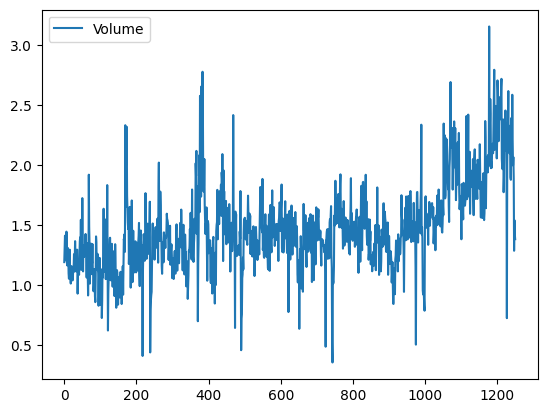

In [10]:
Smarket.plot(y='Volume')

In [11]:
# train test split
test_size = int(Smarket.shape[0]/2)
train_size = Smarket.shape[0] - test_size
Smarket_train, Smarket_test = train_test_split(Smarket, test_size=test_size, random_state=0)

logistic regression

In [12]:
X_train = Smarket_train[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
X_train = sm.add_constant(X_train)
y_train = Smarket_train.Direction == 'Up'
logit_model =  sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = logit_model.fit()
summarize(results)

,coef,std err,z,P>|z|
const,0.2397,0.356,0.673,0.501
Lag1,-0.0705,0.071,-0.994,0.320
Lag2,-0.0950,0.073,-1.304,0.192
Lag3,-0.0201,0.070,-0.285,0.775
Lag4,-0.0757,0.071,-1.064,0.287
Lag5,-0.0306,0.071,-0.430,0.667
Volume,-0.0478,0.234,-0.204,0.838


In [13]:
results.params

const     0.239746
Lag1     -0.070536
Lag2     -0.094952
Lag3     -0.020062
Lag4     -0.075651
Lag5     -0.030638
Volume   -0.047785
dtype: float64

In [14]:
results.pvalues

const     0.500785
Lag1      0.320426
Lag2      0.192127
Lag3      0.775445
Lag4      0.287125
Lag5      0.667166
Volume    0.838257
dtype: float64

In [15]:
train_probs = results.predict()
train_probs[:10]

array([0.47190129, 0.57946735, 0.57567898, 0.56899851, 0.38438716,
       0.47090093, 0.53209421, 0.49972888, 0.64023122, 0.53385571])

In [16]:
train_labels = np.array(['Down']*train_size)
train_labels[train_probs >0.5] = "Up"

In [17]:
confusion_table(train_labels, Smarket_train.Direction)

Truth,Down,Up
Predicted,,
Down,37,24
Up,249,315


In [18]:
# training misclassification error rate
np.mean(train_labels != Smarket_train.Direction)

0.4368

In [19]:
X_test = Smarket_test[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
X_test = sm.add_constant(X_test)
test_probs = results.predict(exog=X_test)

In [20]:
test_labels = np.array(['Down']*test_size)
test_labels[test_probs >0.5] = "Up"

In [21]:
confusion_table(test_labels, Smarket_test.Direction)

Truth,Down,Up
Predicted,,
Down,29,33
Up,287,276


In [22]:
# test misclassification error rate
np.mean(test_labels != Smarket_test.Direction)

0.512

LDA

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [24]:
# LDA estimator automatically adds an intercept
# we do not need to manually add an intercept term 
X_train = Smarket_train[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
X_test = Smarket_test[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
L_train = Smarket_train.Direction
L_test = Smarket_test.Direction

# lda can pass in categorical values
lda = LDA(store_covariance=True)
lda.fit(X_train, L_train)

LinearDiscriminantAnalysis(store_covariance=True)

In [25]:
lda.classes_

array(['Down', 'Up'], dtype='<U4')

In [26]:
lda.means_

array([[ 0.04089161,  0.06325175, -0.00554545,  0.05329371, -0.03643007,
         1.48425654],
       [-0.04480531, -0.05177581, -0.02932153, -0.03770206, -0.0730944 ,
         1.48086664]])

In [27]:
# down probability and up probability
lda.priors_

array([0.4576, 0.5424])

In [28]:
# covariance matrix for LDA
lda.covariance_

array([[ 1.31461073, -0.04198503, -0.01099475, -0.07295838,  0.05809136,
         0.02479626],
       [-0.04198503,  1.24793287,  0.06265176,  0.00565136, -0.02605601,
        -0.01778794],
       [-0.01099475,  0.06265176,  1.33595843, -0.05413749, -0.09917623,
        -0.01963951],
       [-0.07295838,  0.00565136, -0.05413749,  1.30370819, -0.02257307,
        -0.02196289],
       [ 0.05809136, -0.02605601, -0.09917623, -0.02257307,  1.30252522,
        -0.01435645],
       [ 0.02479626, -0.01778794, -0.01963951, -0.02196289, -0.01435645,
         0.12004849]])

In [29]:
lda_pred = lda.predict(X_test)

In [30]:
confusion_table(lda_pred, L_test)

Truth,Down,Up
Predicted,,
Down,29,32
Up,287,277


In [31]:
# test misclassification error rate

np.mean(lda_pred != L_test)

0.5104

In [32]:
# extract lda probability
lda_prob = lda.predict_proba(X_test)
np.all(np.where(lda_prob[:,1] >= 0.5, 'Up', 'Down') == lda_pred)

True

QDA

In [33]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

In [34]:
qda = QDA(store_covariance=True)
qda.fit(X_train, L_train)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [35]:
qda.means_, qda.priors_

(array([[ 0.04089161,  0.06325175, -0.00554545,  0.05329371, -0.03643007,
          1.48425654],
        [-0.04480531, -0.05177581, -0.02932153, -0.03770206, -0.0730944 ,
          1.48086664]]),
 array([0.4576, 0.5424]))

In [36]:
# covariance matrix for the first class
qda.covariance_[0]

array([[ 1.37120236, -0.10143171, -0.04600766,  0.0672052 ,  0.06067901,
         0.0433024 ],
       [-0.10143171,  1.31921112,  0.00158189,  0.01703982,  0.04281789,
        -0.03653764],
       [-0.04600766,  0.00158189,  1.39389901,  0.13561956, -0.1367548 ,
        -0.02125987],
       [ 0.0672052 ,  0.01703982,  0.13561956,  1.43683104, -0.02460473,
        -0.037544  ],
       [ 0.06067901,  0.04281789, -0.1367548 , -0.02460473,  1.21902404,
        -0.00917001],
       [ 0.0433024 , -0.03653764, -0.02125987, -0.037544  , -0.00917001,
         0.13008739]])

In [37]:
# covariance matrix for the second class
# the covariance matrix is different from the first class
qda.covariance_[1]

array([[ 1.2746717 ,  0.0078917 ,  0.0184629 , -0.19157536,  0.0562532 ,
         0.0093387 ],
       [ 0.0078917 ,  1.19521561,  0.1145163 , -0.00391789, -0.08428433,
        -0.00208354],
       [ 0.0184629 ,  0.1145163 ,  1.2950083 , -0.21446008, -0.068077  ,
        -0.01838944],
       [-0.19157536, -0.00391789, -0.21446008,  1.19917388, -0.02099355,
        -0.00895493],
       [ 0.0562532 , -0.08428433, -0.068077  , -0.02099355,  1.38064027,
        -0.01881457],
       [ 0.0093387 , -0.00208354, -0.01838944, -0.00895493, -0.01881457,
         0.11229408]])

In [38]:
qda_pred = qda.predict(X_test)
confusion_table(qda_pred, L_test)

Truth,Down,Up
Predicted,,
Down,71,71
Up,245,238


In [39]:
# test misclassification error rate

np.mean(qda_pred != L_test)

0.5056

K-nearest neighbors

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
# 1 nearest neighbor
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, L_train)
knn1_pred = knn1.predict(X_test)
confusion_table(knn1_pred, L_test)

Truth,Down,Up
Predicted,,
Down,136,141
Up,180,168


In [42]:
# test misclassification error rate

np.mean(knn1_pred != L_test)

0.5136

In [43]:
# 3 nearest neighbors
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, L_train)
knn3_pred = knn3.predict(X_test)
confusion_table(knn3_pred, L_test)

Truth,Down,Up
Predicted,,
Down,147,121
Up,169,188


In [44]:
# test misclassification error rate

np.mean(knn3_pred != L_test)

0.464